# Figures and examples of covariate shift
[Context-aware knowledge discovery tutorial](https://github.com/REFRAME/tutorial) at ECML-PKDD 2016

Meelis Kull 


In [128]:
#include plots
%matplotlib inline



import os
import sys
import numpy as np 
import math
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)
from cvxopt import matrix, solvers
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.neighbors.kde import KernelDensity
#%matplotlib inline

 ## Kernel Mean Matching
 The following is downloaded from https://github.com/vodp/py-kmm  an implementation of Kernel Mean Matching

References:
  1. Gretton, Arthur, et al. "Covariate shift by kernel mean matching." Dataset shift in machine learning 3.4 (2009): 5.
  2. Huang, Jiayuan, et al. "Correcting sample selection bias by unlabeled data." Advances in neural information processing systems. 2006.

In [129]:
def kernel_mean_matching(X, Z, kern='lin', B=1.0, eps=None):
    nx = X.shape[0]
    nz = Z.shape[0]
    if eps == None:
        eps = B/math.sqrt(nz)
    if kern == 'lin':
        K = np.dot(Z, Z.T)
        kappa = np.sum(np.dot(Z, X.T)*float(nz)/float(nx),axis=1)
    elif kern == 'rbf':
        K = compute_rbf(Z,Z,3)
        kappa = np.sum(compute_rbf(Z,X),axis=1)*float(nz)/float(nx)
    else:
        raise ValueError('unknown kernel')
        
    K = matrix(K)
    kappa = matrix(kappa)
    G = matrix(np.r_[np.ones((1,nz)), -np.ones((1,nz)), np.eye(nz), -np.eye(nz)])
    h = matrix(np.r_[nz*(1+eps), nz*(eps-1), B*np.ones((nz,)), np.zeros((nz,))])
    
    sol = solvers.qp(K, -kappa, G, h)
    coef = np.array(sol['x'])
    return coef

def compute_rbf(X, Z, sigma=1.0):
    K = np.zeros((X.shape[0], Z.shape[0]), dtype=float)
    for i, vx in enumerate(X):
        K[i,:] = np.exp(-np.sum((vx-Z)**2, axis=1)/(2.0*sigma))
    return K


## Plot functions

In [130]:

def create_fig(name,elements,save_pdf=False,save_png=False,show=True):
  plt.close()
  plt.figure()
  if 'train'       in elements: plt.scatter(train[:,0], train[:,1], color='blue', marker='o',s=40,lw=2,label='train',zorder=1) 
  if 'test'        in elements: plt.scatter(test[:,0], -0.23+0*test[:,1], color='red', s=40,marker='^',label='test',zorder=1) 
  if 'test-label'  in elements: plt.scatter(test[:,0], test[:,1], color='red', s=40,label='test ground truth',zorder=1) 
  if 'true'        in elements: plt.plot(target[:,0], target[:,1], color='black',label='true',zorder=2)
  if 'linear'      in elements: plt.plot(target[:,0], linear.predict(target[:,0:1]), color='blue',lw=3,label='linear',zorder=2) 
  if 'kde002'       in elements: plt.plot(target[:,0], kde002.predict(target[:,0:1]), color='green',lw=3,label='KDE-ratio-weighted linear, W=0.02',zorder=4) 
  if 'kde002-coef'  in elements: plt.scatter(train[:,0], train[:,1], color='green', s=10+kde002_ratio*40,label='KDE-ratio-weighted train, W=0.02',zorder=3)
  if 'kde002-train' in elements: plt.fill_between(target[:,0],np.repeat(-0.25,np.shape(target)[0]),-0.25+0.15*np.exp(kde002_train.score_samples(target[:,0:1])),facecolor='blue',label='KDE on train, W=0.02',alpha=0.5,zorder=4) 
  if 'kde002-test'  in elements: plt.fill_between(target[:,0],np.repeat(-0.25,np.shape(target)[0]),-0.25+0.15*np.exp(kde002_test.score_samples(target[:,0:1])),facecolor='red',label='KDE on test, W=0.02',alpha=0.5,zorder=4) 
  if 'kde005'       in elements: plt.plot(target[:,0], kde005.predict(target[:,0:1]), color='green',lw=3,label='KDE-ratio-weighted linear, W=0.05',zorder=4) 
  if 'kde005-coef'  in elements: plt.scatter(train[:,0], train[:,1], color='green', s=10+kde005_ratio*40,label='KDE-ratio-weighted train, W=0.05',zorder=3)
  if 'kde005-train' in elements: plt.fill_between(target[:,0],np.repeat(-0.25,np.shape(target)[0]),-0.25+0.15*np.exp(kde005_train.score_samples(target[:,0:1])),facecolor='blue',label='KDE on train, W=0.05',alpha=0.5,zorder=4) 
  if 'kde005-test'  in elements: plt.fill_between(target[:,0],np.repeat(-0.25,np.shape(target)[0]),-0.25+0.15*np.exp(kde005_test.score_samples(target[:,0:1])),facecolor='red',label='KDE on test, W=0.05',alpha=0.5,zorder=4) 
  if 'kde01'       in elements: plt.plot(target[:,0], kde01.predict(target[:,0:1]), color='green',lw=3,label='KDE-ratio-weighted linear, W=0.1',zorder=4) 
  if 'kde01-coef'  in elements: plt.scatter(train[:,0], train[:,1], color='green', s=10+kde01_ratio*40,label='KDE-ratio-weighted train, W=0.1',zorder=3)
  if 'kde01-train' in elements: plt.fill_between(target[:,0],np.repeat(-0.25,np.shape(target)[0]),-0.25+0.15*np.exp(kde01_train.score_samples(target[:,0:1])),facecolor='blue',label='KDE on train, W=0.1',alpha=0.5,zorder=4) 
  if 'kde01-test'  in elements: plt.fill_between(target[:,0],np.repeat(-0.25,np.shape(target)[0]),-0.25+0.15*np.exp(kde01_test.score_samples(target[:,0:1])),facecolor='red',label='KDE on test, W=0.1',alpha=0.5,zorder=4) 
  if 'kde02'       in elements: plt.plot(target[:,0], kde02.predict(target[:,0:1]), color='green',lw=3,label='KDE-ratio-weighted linear, W=0.2',zorder=4) 
  if 'kde02-coef'  in elements: plt.scatter(train[:,0], train[:,1], color='green', s=10+kde02_ratio*40,label='KDE-ratio-weighted train, W=0.2',zorder=3)
  if 'kde02-train' in elements: plt.fill_between(target[:,0],np.repeat(-0.25,np.shape(target)[0]),-0.25+0.15*np.exp(kde02_train.score_samples(target[:,0:1])),facecolor='blue',label='KDE on train, W=0.2',alpha=0.5,zorder=4) 
  if 'kde02-test'  in elements: plt.fill_between(target[:,0],np.repeat(-0.25,np.shape(target)[0]),-0.25+0.15*np.exp(kde02_test.score_samples(target[:,0:1])),facecolor='red',label='KDE on test, W=0.2',alpha=0.5,zorder=4) 
  if 'kmm1'        in elements: plt.plot(target[:,0], kmm1.predict(target[:,0:1]), color='orange',lw=3,label='KMM-weighted linear, B=1',zorder=4) 
  if 'kmm1-coef'   in elements: plt.scatter(train[:,0], train[:,1], color='orange', s=10+coef1[:,0]*40,label='KMM-weighted train, B=1',zorder=3)
  if 'kmm2'        in elements: plt.plot(target[:,0], kmm2.predict(target[:,0:1]), color='orange',lw=3,label='KMM-weighted linear, B=2',zorder=4) 
  if 'kmm2-coef'   in elements: plt.scatter(train[:,0], train[:,1], color='orange', s=10+coef2[:,0]*40,label='KMM-weighted train, B=2',zorder=3)
  if 'kmm5'        in elements: plt.plot(target[:,0], kmm5.predict(target[:,0:1]), color='orange',lw=3,label='KMM-weighted linear, B=5',zorder=4) 
  if 'kmm5-coef'   in elements: plt.scatter(train[:,0], train[:,1], color='orange', s=10+coef5[:,0]*40,label='KMM-weighted train, B=5',zorder=3)
  if 'kmm10'       in elements: plt.plot(target[:,0], kmm10.predict(target[:,0:1]), color='orange',lw=3,label='KMM-weighted linear, B=10',zorder=4) 
  if 'kmm10-coef'  in elements: plt.scatter(train[:,0], train[:,1], color='orange', s=10+coef10[:,0]*40,label='KMM-weighted train, B=10',zorder=3)
  if 'kmm2q'       in elements: plt.plot(target[:,0], kmm2q.predict(target[:,0:1]), color='cyan',lw=3,label='KMM-weighted quadratic, B=2',zorder=4) 
  if 'quadratic'   in elements: plt.plot(target[:,0], quadratic.predict(target[:,0:1]), color='black',lw=5,label='quadratic',zorder=5) 
  if 'covariate-shift'   in elements: plt.plot(0.5+0.5*target[:,0], quadratic.predict(0.5+0.5*target[:,0:1]), color='black',lw=5,label='covariate shift',zorder=5) 
  if 'covariate-obs-shift'   in elements: plt.plot(0.5+0.5*target[:,0], quadratic.predict(target[:,0:1]), color='black',lw=5,label='covariate observation shift',zorder=5) 
  plt.xlabel('X')
  plt.ylabel('Y',rotation=0)
  axes = plt.gca()
  axes.set_xlim([-0.05,1.05])
  axes.set_ylim([-0.25,1.25])
  plt.rcParams.update({'font.size': 16})
  lgd = plt.legend(loc='upper left',prop={'size':16})
  if save_pdf: plt.savefig(name+'.pdf',bbox_extra_artists=(lgd,),bbox_inches='tight')
  if save_png: plt.savefig(name+'.png',bbox_extra_artists=(lgd,),bbox_inches='tight')
  if show: plt.show()

def create_fig_test(name,save_pdf=False,save_png=False,show=True):
  plt.close()
  plt.figure()
  plt.scatter(test[:,0], 0*test[:,1], color='red', s=40,marker='^',label='test',zorder=1) 
  plt.xlabel('X')
  axes = plt.gca()
  axes.set_xlim([-0.05,1.05])
  axes.get_yaxis().set_visible(False)
  axes.set_aspect(5.5)
  plt.rcParams.update({'font.size': 16})
  lgd = plt.legend(loc='upper left',prop={'size':16})
  if save_pdf: plt.savefig(name+'.pdf',bbox_extra_artists=(lgd,),bbox_inches='tight')
  if save_png: plt.savefig(name+'.png',bbox_extra_artists=(lgd,),bbox_inches='tight')
  if show: plt.show()


## Regression example of covariate shift

1. Task, linear fit, weighted linear fit
2. KMM method
3. Effect of the parameter B
4. KDE - kernel density estimation
5. Density ratio estimation 


In [131]:
np.random.seed(1)

# target function:
f = lambda x: x**2

# noise level:
sigma = 0.1

# create training data:
n_train = 40
x = np.random.random(n_train)
y = f(x) + np.random.normal(scale=sigma,size=n_train)
train = np.c_[x,y]

# create test data:
n_test = 40
x = 0.5+0.5*np.random.random(n_test)
y = f(x) + np.random.normal(scale=sigma,size=n_test)
test = np.c_[x,y]

# create data with the target function:
x = np.arange(0,1,0.001)
y = f(x)
target = np.c_[x,y]

# fit a linear model:
linear = linear_model.LinearRegression()
linear.fit(train[:,0:1],train[:,1:2])

# fit a quadratic model:
quadratic = make_pipeline(PolynomialFeatures(2), linear_model.LinearRegression())
quadratic.fit(train[:,0:1],train[:,1:2])

# fit a KMM-weighted linear model, B=1 
kmm1 = linear_model.LinearRegression()
coef1 = kernel_mean_matching(test, train, kern='rbf', B=1)
kmm1.fit(train[:,0:1],train[:,1:2],sample_weight=coef1[:,0])

# fit a KMM-weighted linear model, B=2 
kmm2 = linear_model.LinearRegression()
coef2 = kernel_mean_matching(test, train, kern='rbf', B=2)
kmm2.fit(train[:,0:1],train[:,1:2],sample_weight=coef2[:,0])

# fit a KMM-weighted linear model, B=5 
kmm5 = linear_model.LinearRegression()
coef5 = kernel_mean_matching(test, train, kern='rbf', B=5)
kmm5.fit(train[:,0:1],train[:,1:2],sample_weight=coef5[:,0])

# fit a KMM-weighted linear model, B=10 
kmm10 = linear_model.LinearRegression()
coef10 = kernel_mean_matching(test, train, kern='rbf', B=10)
kmm10.fit(train[:,0:1],train[:,1:2],sample_weight=coef10[:,0])

# fit a KMM-weighted quadratic model, B=2 
#kmm2q = make_pipeline([('poly2',PolynomialFeatures(2)),('linreg',linear_model.LinearRegression())])
kmm2q = Pipeline([('poly2',PolynomialFeatures(2)),('linreg',linear_model.LinearRegression())])
coef2 = kernel_mean_matching(test, train, kern='rbf', B=2)
kmm2q.fit(train[:,0:1],train[:,1:2],**{'linreg__sample_weight': coef2[:,0]})

# fit a KDE-ratio-weighted linear model, bandwidth=0.02 
bandwidth = 0.02
kde002_train = KernelDensity(kernel='gaussian', bandwidth=bandwidth).fit(train[:,0:1])
kde002_test = KernelDensity(kernel='gaussian', bandwidth=bandwidth).fit(test[:,0:1])
kde002_ratio = np.exp(kde002_test.score_samples(train[:,0:1]) - kde002_train.score_samples(train[:,0:1]))
kde002 = linear_model.LinearRegression()
kde002.fit(train[:,0:1],train[:,1:2],sample_weight=kde002_ratio)

# fit a KDE-ratio-weighted linear model, bandwidth=0.05 
bandwidth = 0.05
kde005_train = KernelDensity(kernel='gaussian', bandwidth=bandwidth).fit(train[:,0:1])
kde005_test = KernelDensity(kernel='gaussian', bandwidth=bandwidth).fit(test[:,0:1])
kde005_ratio = np.exp(kde005_test.score_samples(train[:,0:1]) - kde005_train.score_samples(train[:,0:1]))
kde005 = linear_model.LinearRegression()
kde005.fit(train[:,0:1],train[:,1:2],sample_weight=kde005_ratio)

# fit a KDE-ratio-weighted linear model, bandwidth=0.1 
bandwidth = 0.1
kde01_train = KernelDensity(kernel='gaussian', bandwidth=bandwidth).fit(train[:,0:1])
kde01_test = KernelDensity(kernel='gaussian', bandwidth=bandwidth).fit(test[:,0:1])
kde01_ratio = np.exp(kde01_test.score_samples(train[:,0:1]) - kde01_train.score_samples(train[:,0:1]))
kde01 = linear_model.LinearRegression()
kde01.fit(train[:,0:1],train[:,1:2],sample_weight=kde01_ratio)

# fit a KDE-ratio-weighted linear model, bandwidth=0.2 
bandwidth = 0.2
kde02_train = KernelDensity(kernel='gaussian', bandwidth=bandwidth).fit(train[:,0:1])
kde02_test = KernelDensity(kernel='gaussian', bandwidth=bandwidth).fit(test[:,0:1])
kde02_ratio = np.exp(kde02_test.score_samples(train[:,0:1]) - kde02_train.score_samples(train[:,0:1]))
kde02 = linear_model.LinearRegression()
kde02.fit(train[:,0:1],train[:,1:2],sample_weight=kde02_ratio)

# calculate test errors:
err = lambda model: round((sum((model.predict(test[:,0:1])-test[:,1:2])**2))[0],3)

     pcost       dcost       gap    pres   dres
 0: -7.4555e+02 -9.8386e+02  2e+03  4e-01  4e-16
 1: -6.2628e+02 -8.1011e+02  3e+02  4e-02  4e-16
 2: -5.9757e+02 -6.3601e+02  4e+01  1e-03  3e-16
 3: -6.0178e+02 -6.1645e+02  2e+01  5e-04  3e-16
 4: -6.0351e+02 -6.1075e+02  8e+00  2e-04  3e-16
 5: -6.0497e+02 -6.0703e+02  2e+00  6e-05  6e-16
 6: -6.0522e+02 -6.0632e+02  1e+00  3e-05  4e-16
 7: -6.0534e+02 -6.0587e+02  5e-01  1e-05  4e-16
 8: -6.0553e+02 -6.0555e+02  2e-02  1e-08  1e-15
 9: -6.0554e+02 -6.0554e+02  2e-04  1e-10  8e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -7.4437e+02 -1.8235e+03  4e+03  3e-01  3e-16
 1: -6.5421e+02 -1.1740e+03  5e+02  2e-04  3e-16
 2: -6.7949e+02 -7.2380e+02  4e+01  2e-05  2e-16
 3: -7.0012e+02 -7.0677e+02  7e+00  2e-06  2e-16
 4: -7.0387e+02 -7.0458e+02  7e-01  2e-07  2e-16
 5: -7.0426e+02 -7.0429e+02  3e-02  6e-09  3e-16
 6: -7.0427e+02 -7.0427e+02  7e-04  7e-11  3e-16
Optimal solution found.
     pcost       dcost 

## Plots of slides

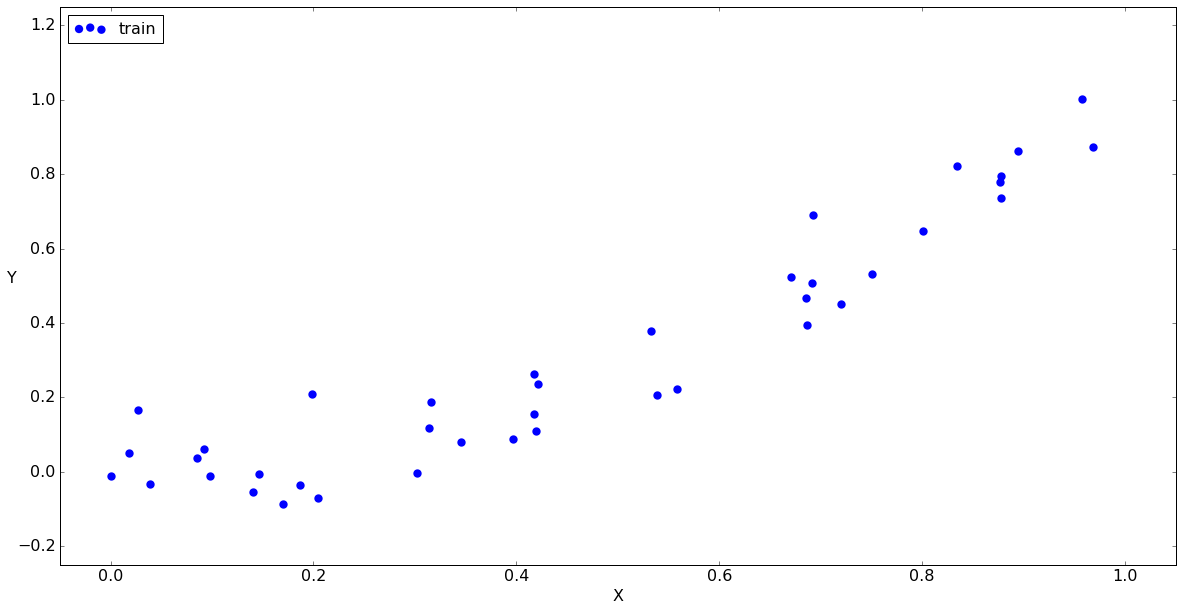

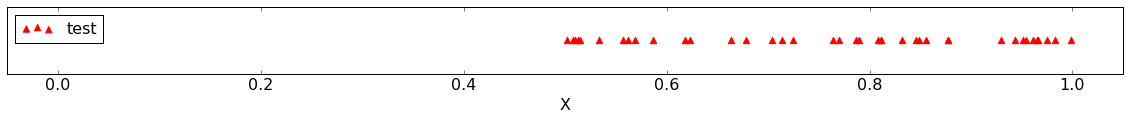

In [132]:
create_fig('fig1a',['train'])
create_fig_test('fig1b')

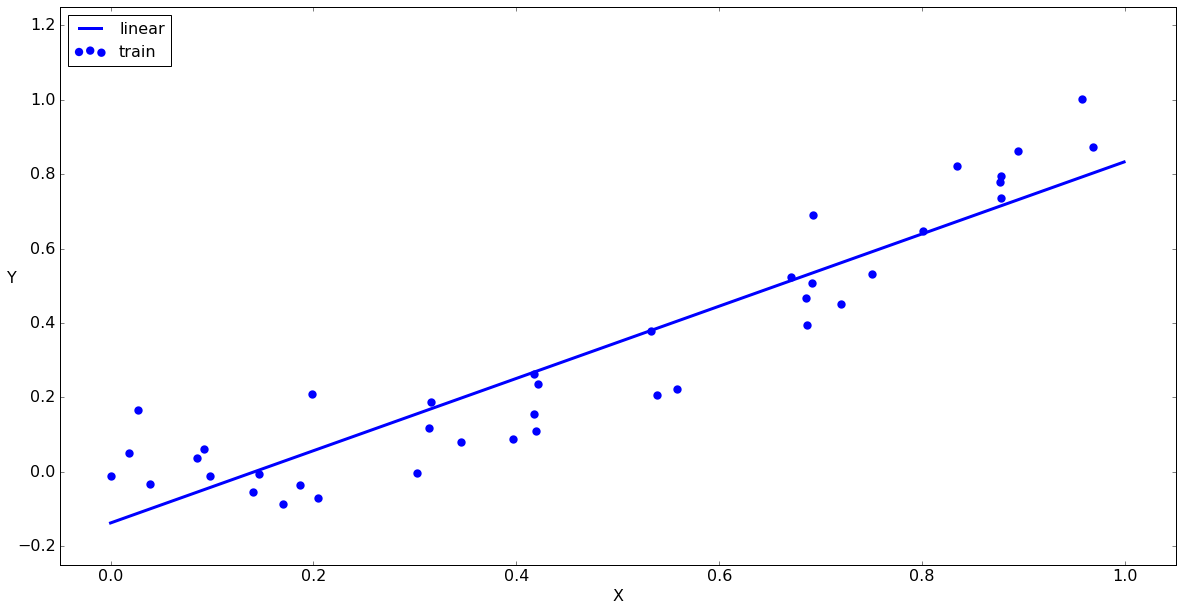

In [133]:
create_fig('fig2',['train','linear'])

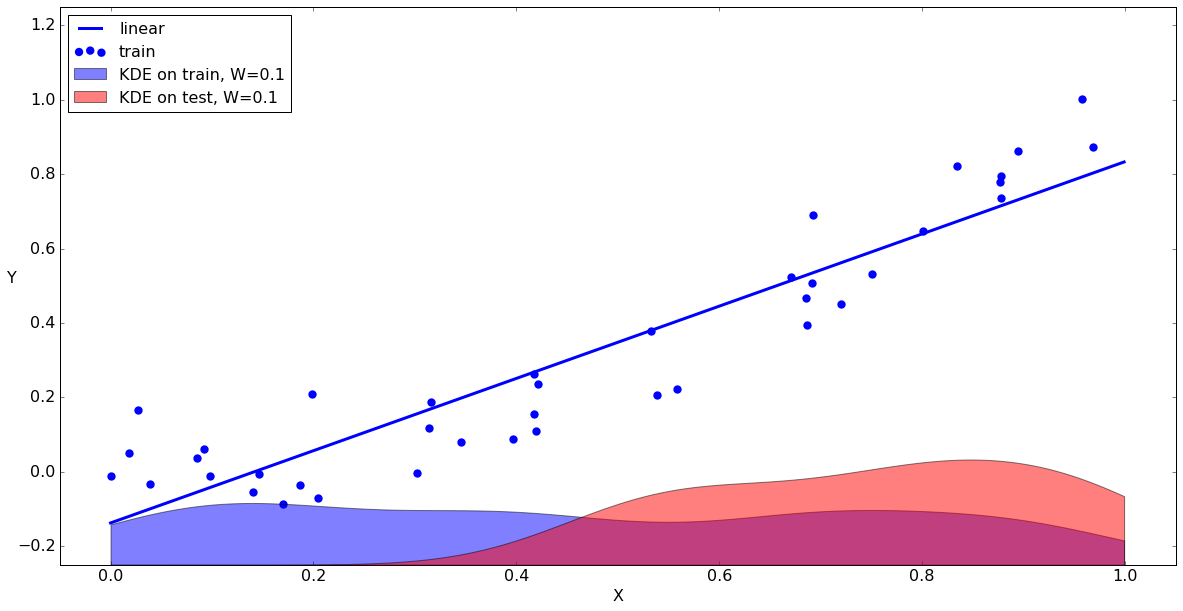

In [134]:
create_fig('fig3',['train','linear','kde01-train','kde01-test'])

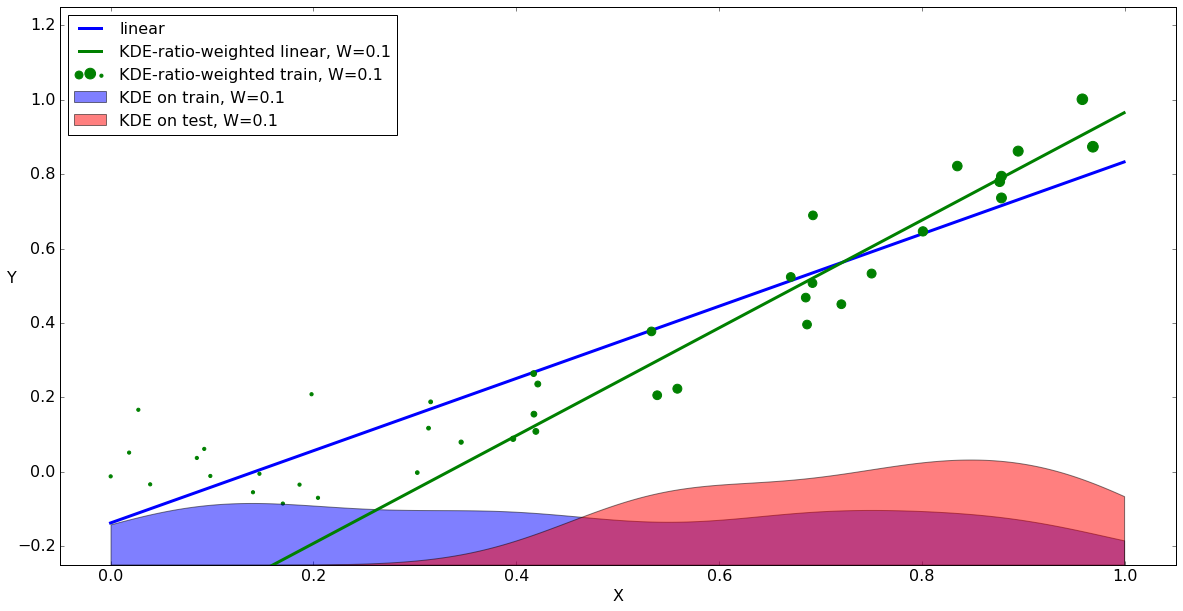

In [135]:
create_fig('fig4',['kde01-coef','kde01','linear','kde01-train','kde01-test'])

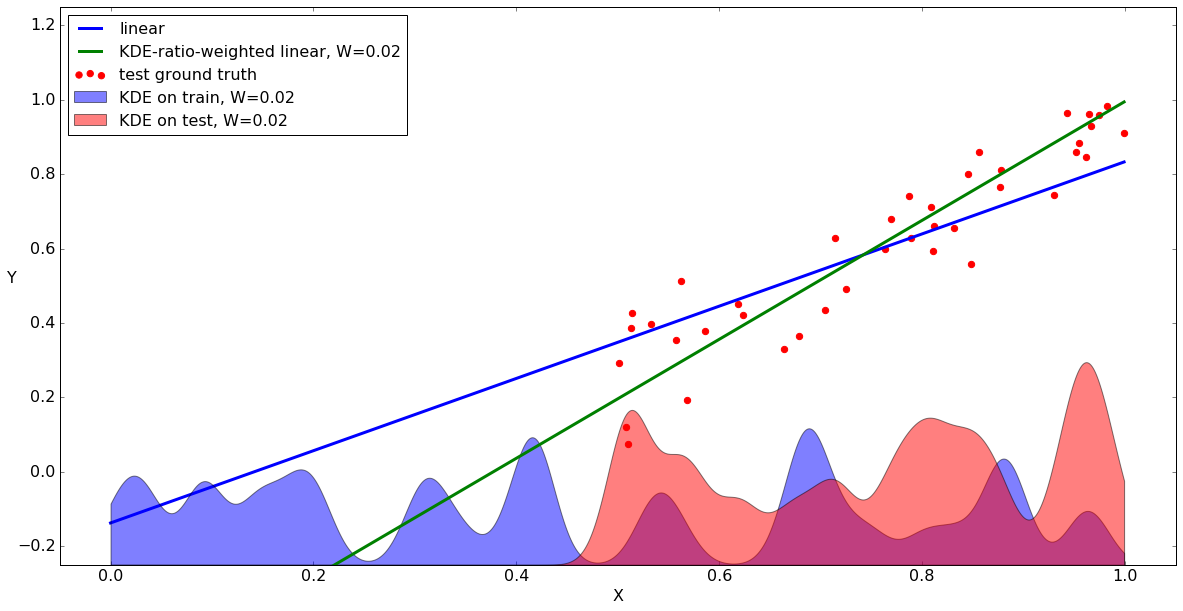

In [136]:
create_fig('fig5a',['kde002','linear','kde002-train','kde002-test','test-label'])

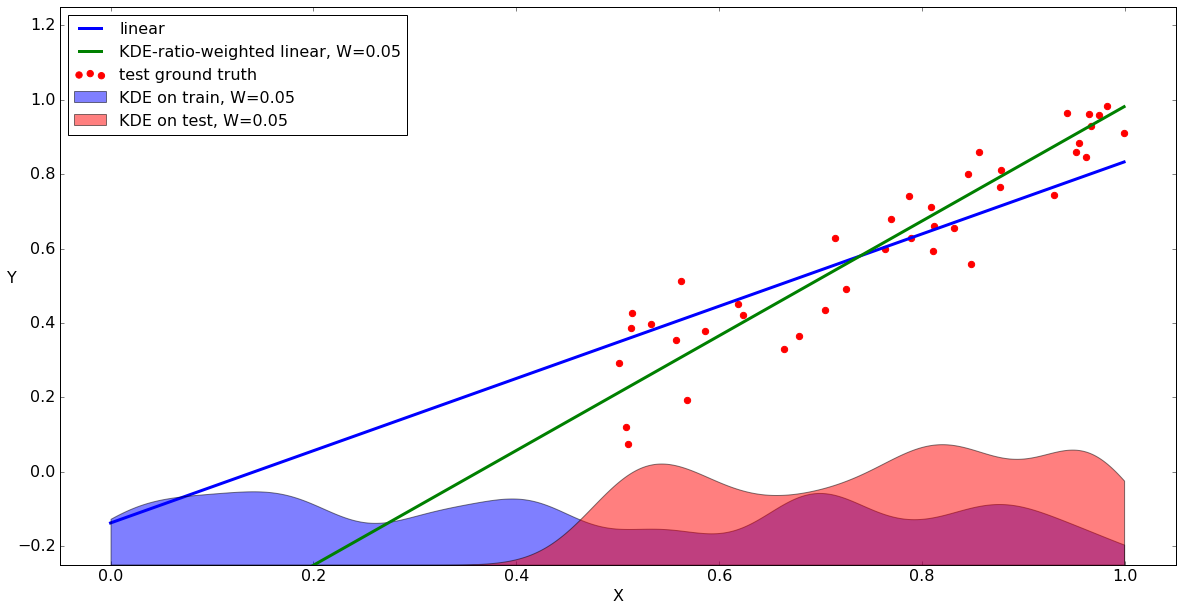

In [137]:
create_fig('fig5b',['kde005','linear','kde005-train','kde005-test','test-label'])

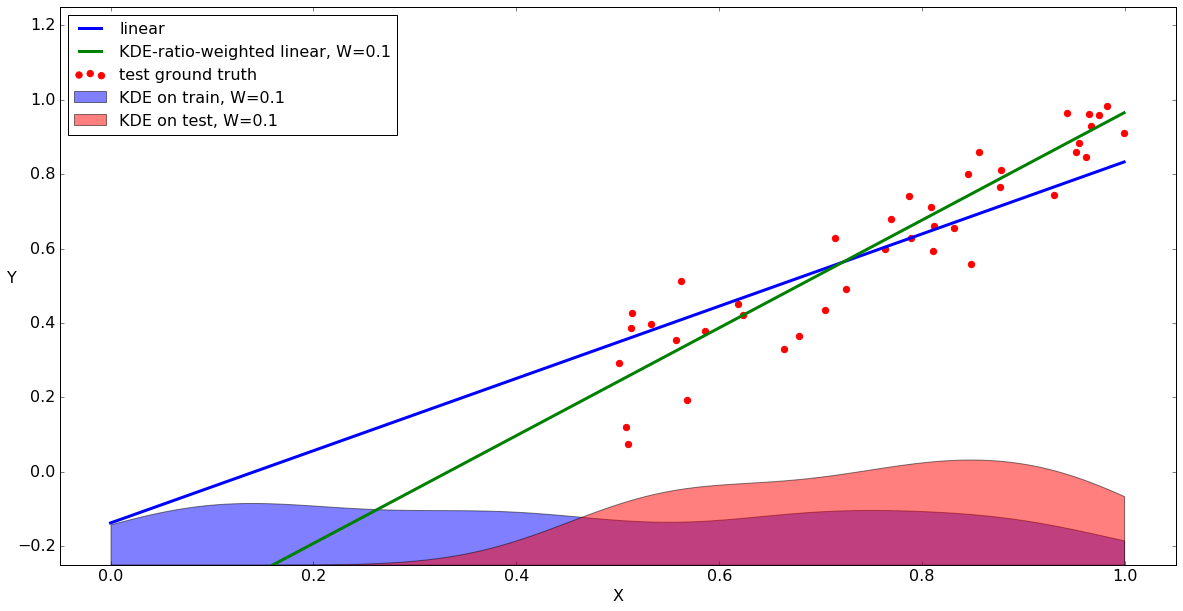

In [138]:
create_fig('fig5c',['kde01','linear','kde01-train','kde01-test','test-label'])

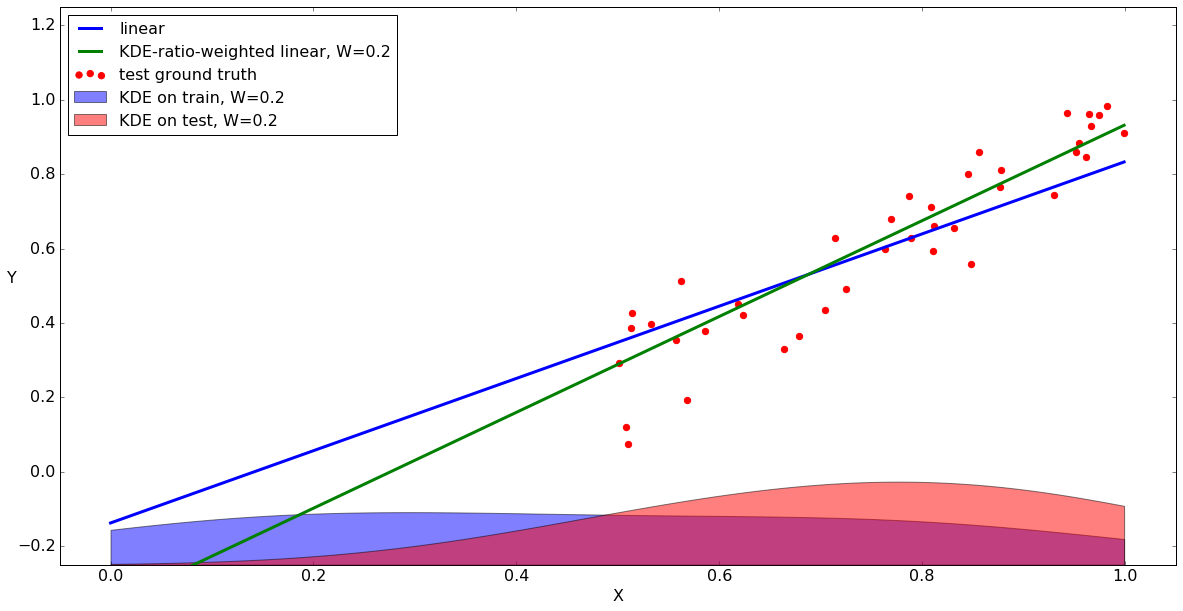

In [139]:
create_fig('fig5d',['kde02','linear','kde02-train','kde02-test','test-label'])

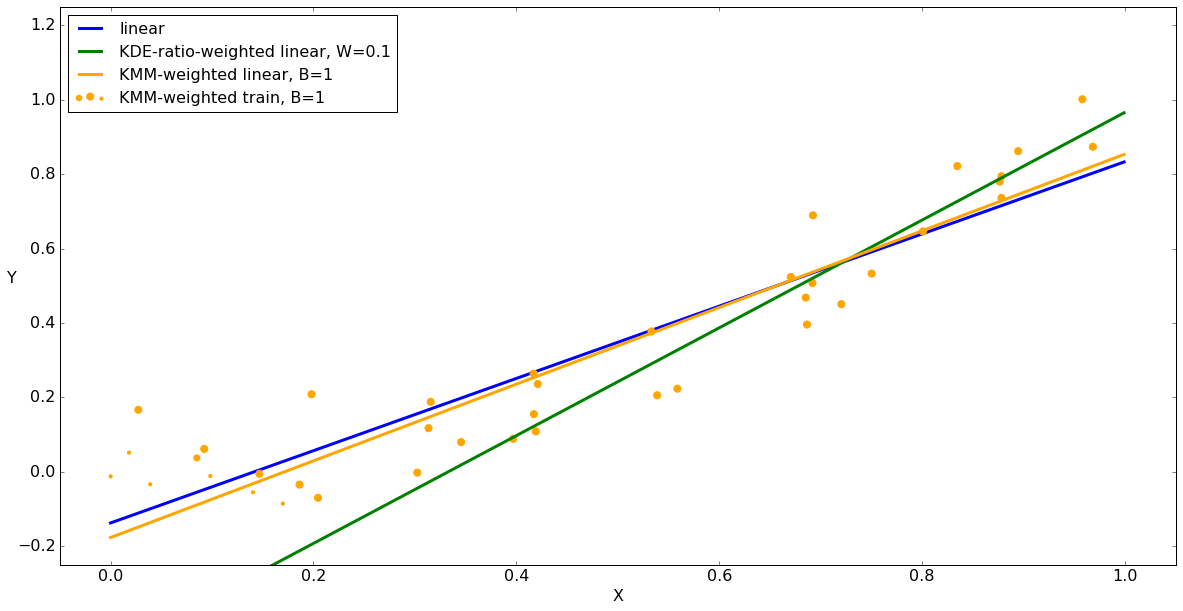

In [140]:
create_fig('fig6a',['kmm1-coef','kmm1','kde01','linear'])

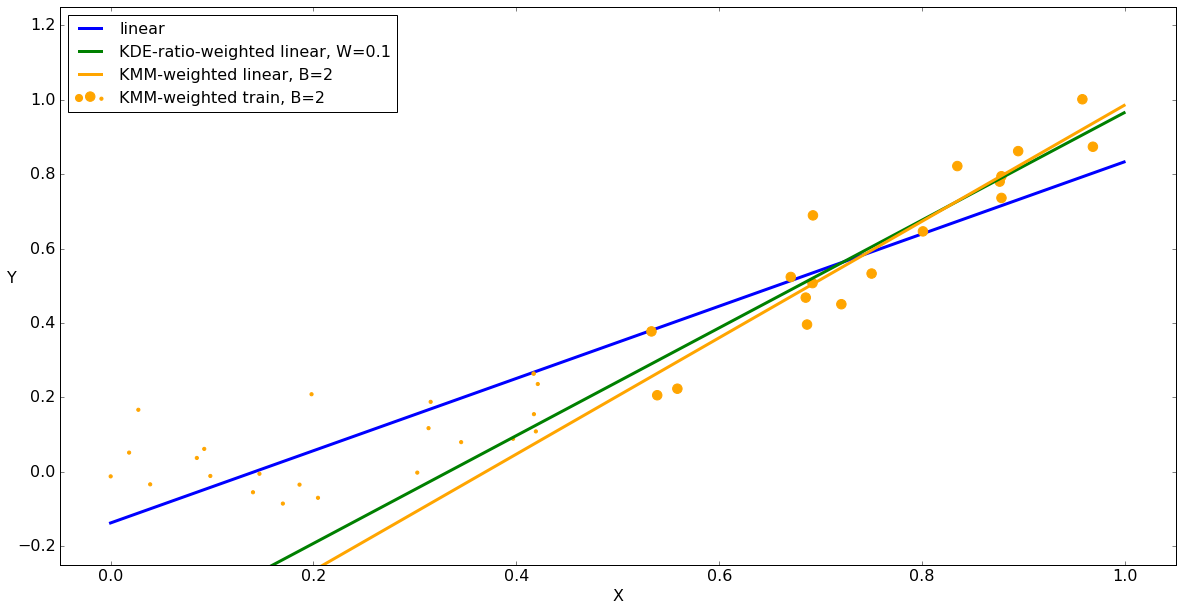

In [141]:
create_fig('fig6b',['kmm2-coef','kmm2','kde01','linear'])

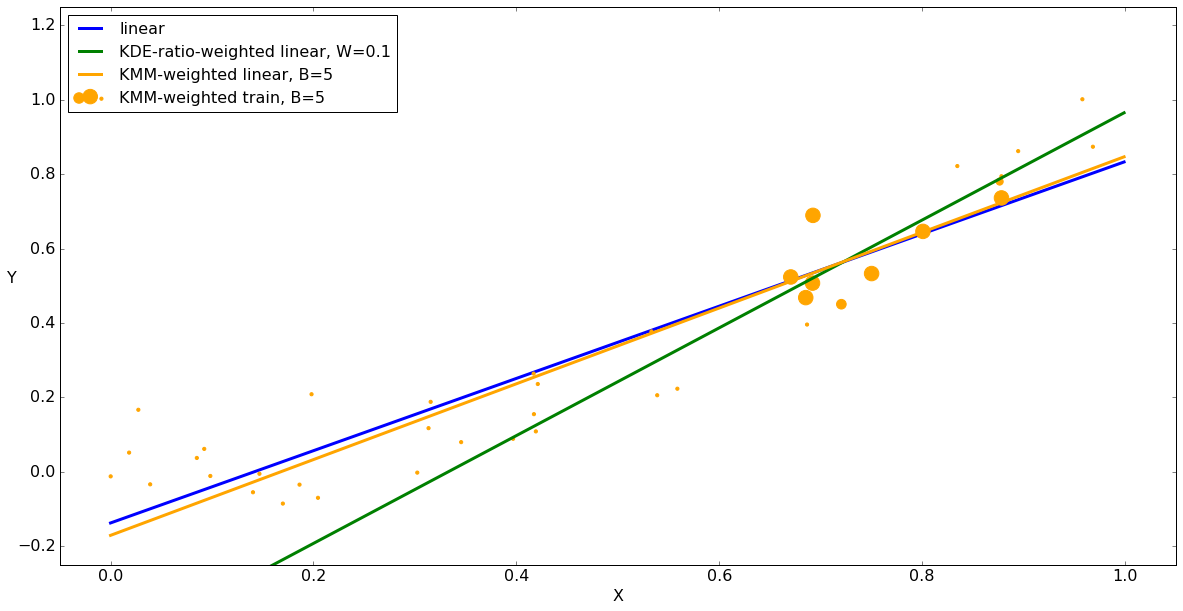

In [142]:
create_fig('fig6c',['kmm5-coef','kmm5','kde01','linear'])

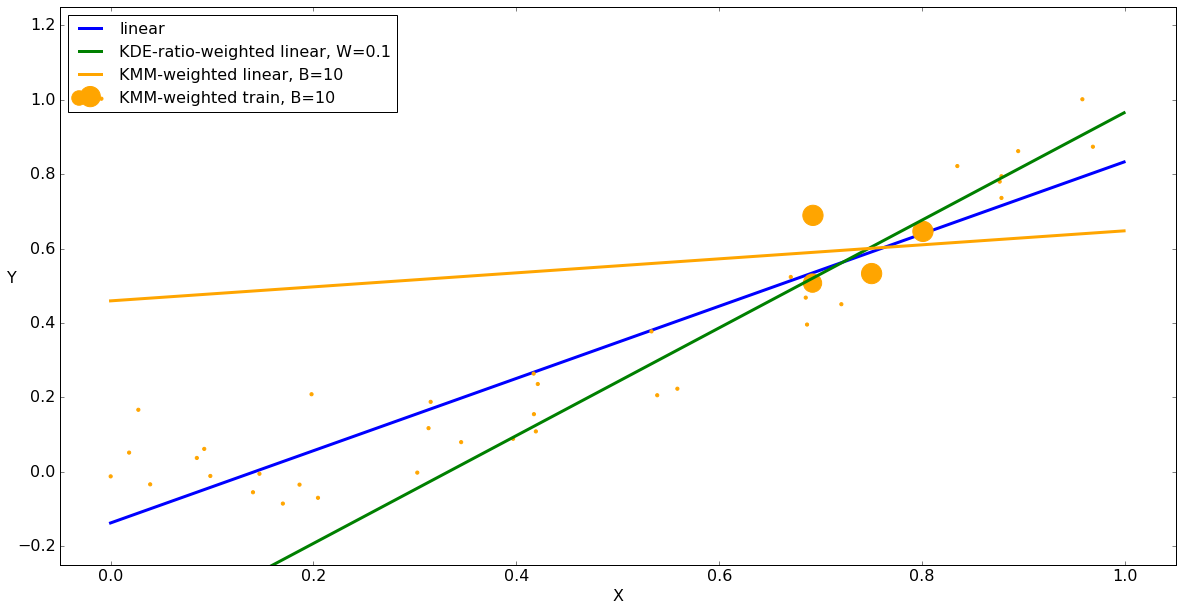

In [143]:
create_fig('fig6d',['kmm10-coef','kmm10','kde01','linear'])

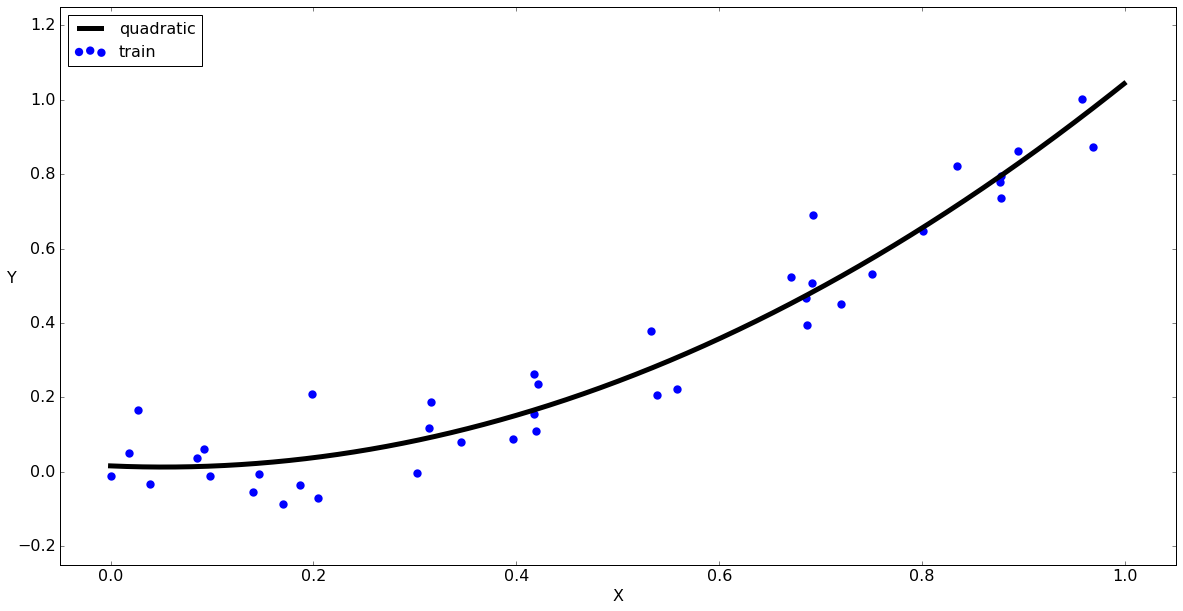

In [144]:
create_fig('fig7',['train','quadratic'])

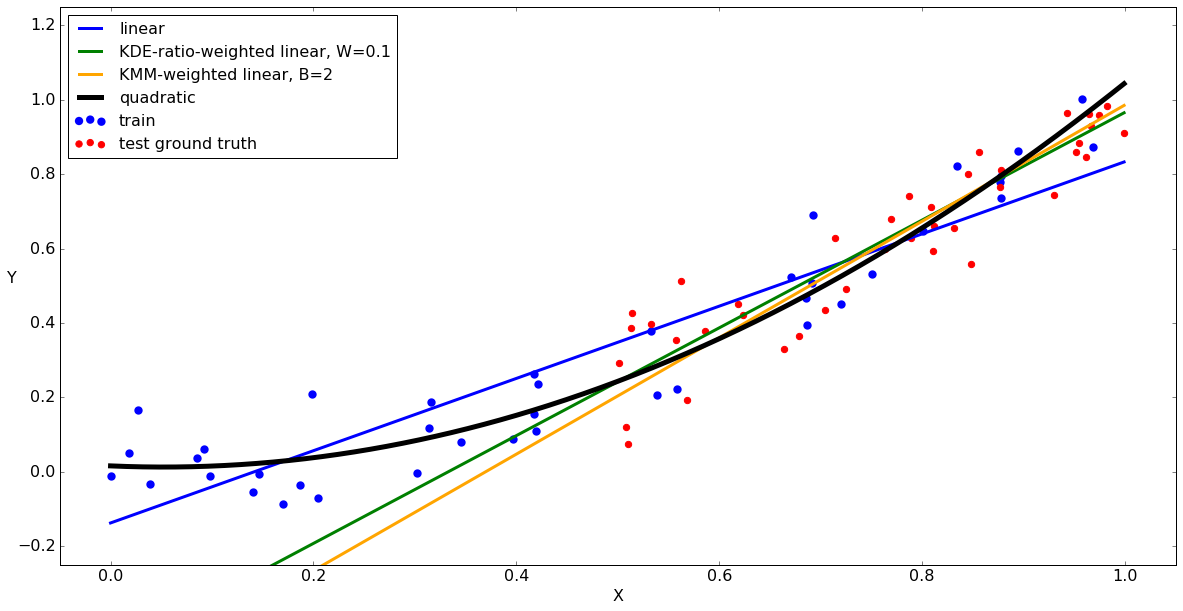

In [145]:
create_fig('fig8',['train','test-label','kmm2','kde01','linear','quadratic'])

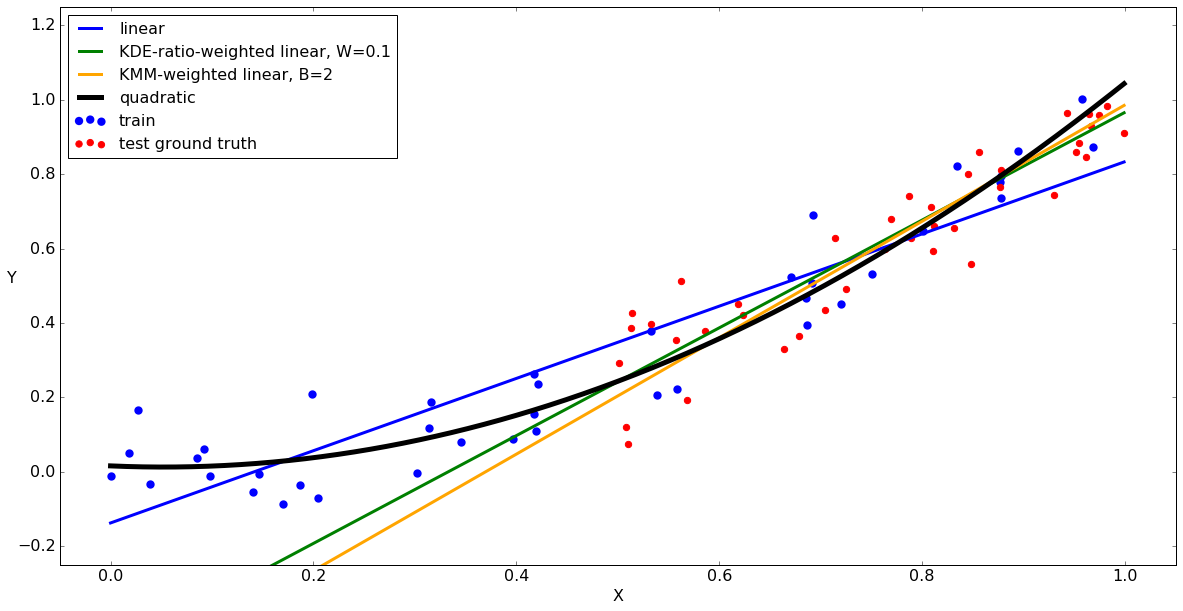

In [146]:
create_fig('fig9',['train','test-label','kmm2','kde01','linear','quadratic'])